In [6]:
import pandas as pd
import plotly.graph_objects as go


df = pd.read_csv('data/binance/BTCUSDT_1m_Futures.csv', index_col=0, parse_dates=True)

df.index = pd.to_datetime(df.index, unit='ms')

data = df[['Open', 'High', 'Low', 'Close', 'Volume']][-100000:]

In [7]:
# fig = go.Figure(data=[go.Candlestick(x=data.index,
#                 open=data['Open'],
#                 high=data['High'],
#                 low=data['Low'],
#                 close=data['Close'])])
# fig.update_layout(
#     autosize=False,
#     width=1000,
#     height=500,
#     margin=dict(
#         l=10,
#         r=10,
#         b=10,
#         t=10,
#         pad=4
#     ),
#     paper_bgcolor="LightSteelBlue",
# )
# fig.update_yaxes(fixedrange=False)
# fig.show()


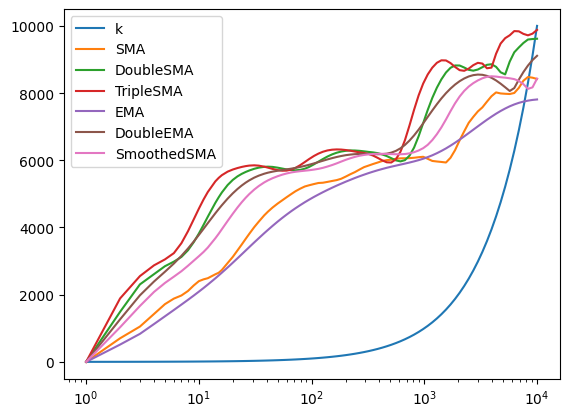

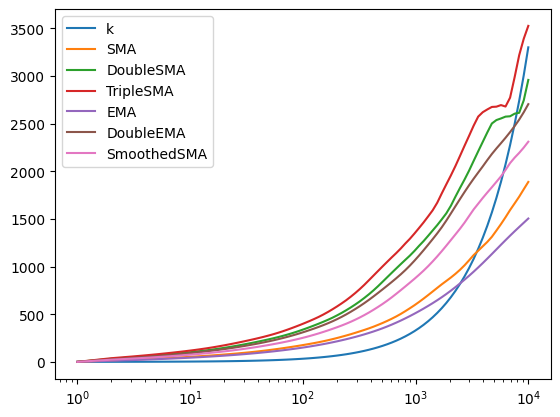

/tmp/ipykernel_174757/90677835.py:51: RuntimeWarning:

invalid value encountered in divide



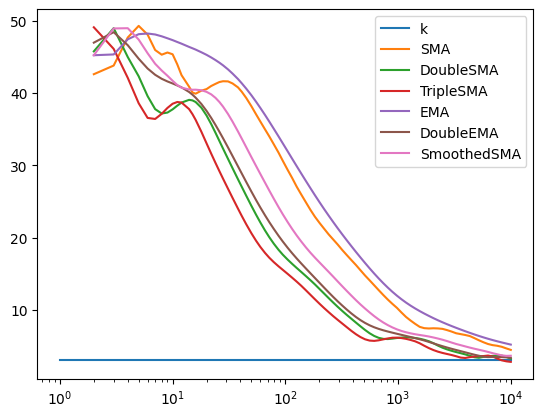

In [8]:
from matplotlib import pyplot as plt
import numpy as np

indicators = pd.DataFrame(index=data.index)

x = np.unique(np.round(np.logspace(0, 4, 100)).astype(int))

max_h = []

avg_h = []

for k in x:
    
    indicators['SMA'] = data['Close'].rolling(window=k).mean().round(1)
    
    indicators['DoubleSMA'] = indicators['SMA'].rolling(window=k).mean().rolling(window=k).mean().round(1)
    
    indicators['TripleSMA'] = indicators['DoubleSMA'].rolling(window=k).mean().round(1)
    
    indicators['EMA'] = data['Close'].ewm(span=k).mean().round(1)
    
    indicators['DoubleEMA'] = indicators['EMA'].ewm(span=k).mean().ewm(span=k).mean().round(1)
    
    indicators['SmoothedSMA'] = data['Close'].rolling(window=k).mean().ewm(span=k).mean().round(1)
    
    
    max_diff = [k]
    
    avg_diff = [k*0.33]
    
    for col in indicators.columns:
        max_diff.append((data['Close'] - indicators[col]).abs().max().round(0))
        avg_diff.append((data['Close'] - indicators[col]).abs().mean())
        

    max_h.append(max_diff)
    avg_h.append(avg_diff)
    
n = ['k'] + indicators.columns.to_list()
    
plt.plot(x, max_h, label=n)
plt.legend()
plt.xscale('log')
plt.show()
plt.plot(x, avg_h, label=n)
plt.legend()
plt.xscale('log')
plt.show()


plt.plot(x, np.array(max_h)/np.array(avg_h), label=n)
plt.legend()
plt.xscale('log')

In [9]:
indicators = pd.DataFrame(index=data.index)

price = data.copy()

indicators['SMA'] = data['Close'].rolling(window=10).mean().round(1)

indicators.dropna(inplace=True)

price = price.loc[indicators.index]

max_diff = (data['Close'] - indicators['SMA']).abs().max().round(0)

min_candle_diff = (data['High'] - data['Low']).abs().quantile(0.1).round(1)


print('max diff',max_diff)
print('min_candle_diff',min_candle_diff)

min_candle_diff=1


# indicators = pd.concat([indicators]+[pd.DataFrame({f'Upper_Enveloppe_{i}': indicators['SMA'] + min_candle_diff * i, f'Lower_Enveloppe_{i}': indicators['SMA'] - min_candle_diff * i}, index=indicators.index) for i in range(1, round(max_diff/min_candle_diff)+1)], axis=1)

num_orders = 100

step = round(max_diff / num_orders, 1)

print('step',step)

indicators = pd.concat([indicators]+[pd.DataFrame({f'Upper_Enveloppe_{i}': indicators['SMA'] + step * i, f'Lower_Enveloppe_{i}': indicators['SMA'] - step * i}, index=indicators.index) for i in range(1, num_orders+1)], axis=1)


new_columns = indicators.columns[indicators.mean().argsort()]

indicators = indicators[new_columns]

inrange = (indicators < price['High'].values.reshape(-1, 1)) & (indicators > price['Low'].values.reshape(-1, 1))

ra = indicators[inrange].max(axis=1) - indicators[inrange].min(axis=1)
loss = ra/(price['High'] - price['Low']).abs()

print(loss.mean())

indicators

max diff 2402.0
min_candle_diff 15.9
step 24.0
0.4461304310233455


,Lower_Enveloppe_100,Lower_Enveloppe_99,Lower_Enveloppe_98,Lower_Enveloppe_97,Lower_Enveloppe_96,Lower_Enveloppe_95,Lower_Enveloppe_94,Lower_Enveloppe_93,Lower_Enveloppe_92,Lower_Enveloppe_91,...,Upper_Enveloppe_91,Upper_Enveloppe_92,Upper_Enveloppe_93,Upper_Enveloppe_94,Upper_Enveloppe_95,Upper_Enveloppe_96,Upper_Enveloppe_97,Upper_Enveloppe_98,Upper_Enveloppe_99,Upper_Enveloppe_100
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-23 03:56:00,62057.4,62081.4,62105.4,62129.4,62153.4,62177.4,62201.4,62225.4,62249.4,62273.4,...,66641.4,66665.4,66689.4,66713.4,66737.4,66761.4,66785.4,66809.4,66833.4,66857.4
2024-03-23 03:57:00,62055.6,62079.6,62103.6,62127.6,62151.6,62175.6,62199.6,62223.6,62247.6,62271.6,...,66639.6,66663.6,66687.6,66711.6,66735.6,66759.6,66783.6,66807.6,66831.6,66855.6
2024-03-23 03:58:00,62055.6,62079.6,62103.6,62127.6,62151.6,62175.6,62199.6,62223.6,62247.6,62271.6,...,66639.6,66663.6,66687.6,66711.6,66735.6,66759.6,66783.6,66807.6,66831.6,66855.6
2024-03-23 03:59:00,62059.4,62083.4,62107.4,62131.4,62155.4,62179.4,62203.4,62227.4,62251.4,62275.4,...,66643.4,66667.4,66691.4,66715.4,66739.4,66763.4,66787.4,66811.4,66835.4,66859.4
2024-03-23 04:00:00,62072.7,62096.7,62120.7,62144.7,62168.7,62192.7,62216.7,62240.7,62264.7,62288.7,...,66656.7,66680.7,66704.7,66728.7,66752.7,66776.7,66800.7,66824.7,66848.7,66872.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 14:22:00,65039.1,65063.1,65087.1,65111.1,65135.1,65159.1,65183.1,65207.1,65231.1,65255.1,...,69623.1,69647.1,69671.1,69695.1,69719.1,69743.1,69767.1,69791.1,69815.1,69839.1
2024-05-31 14:23:00,65039.1,65063.1,65087.1,65111.1,65135.1,65159.1,65183.1,65207.1,65231.1,65255.1,...,69623.1,69647.1,69671.1,69695.1,69719.1,69743.1,69767.1,69791.1,69815.1,69839.1
2024-05-31 14:24:00,65039.1,65063.1,65087.1,65111.1,65135.1,65159.1,65183.1,65207.1,65231.1,65255.1,...,69623.1,69647.1,69671.1,69695.1,69719.1,69743.1,69767.1,69791.1,69815.1,69839.1


In [10]:
def get_color(c):
    if 'Upper' in c:
        return 'purple'
    if 'Lower' in c:
        return 'cyan'
    return 'blue'



# fig = go.Figure(data=[go.Candlestick(x=data.index,
#                 open=data['Open'],
#                 high=data['High'],
#                 low=data['Low'],
#                 close=data['Close'], name='Price')]+[go.Scatter(x=indicators.index, y=indicators[c], line=dict(color=get_color(c), width=0.5), name=c) for c in indicators.columns])
# fig.update_layout(
#     autosize=False,
#     width=1000,
#     height=500,
#     margin=dict(
#         l=10,
#         r=10,
#         b=10,
#         t=10,
#         pad=4
#     ),
#     paper_bgcolor="LightSteelBlue",
# )
# fig.show()

2.379604164374794


<Axes: ylabel='Date'>

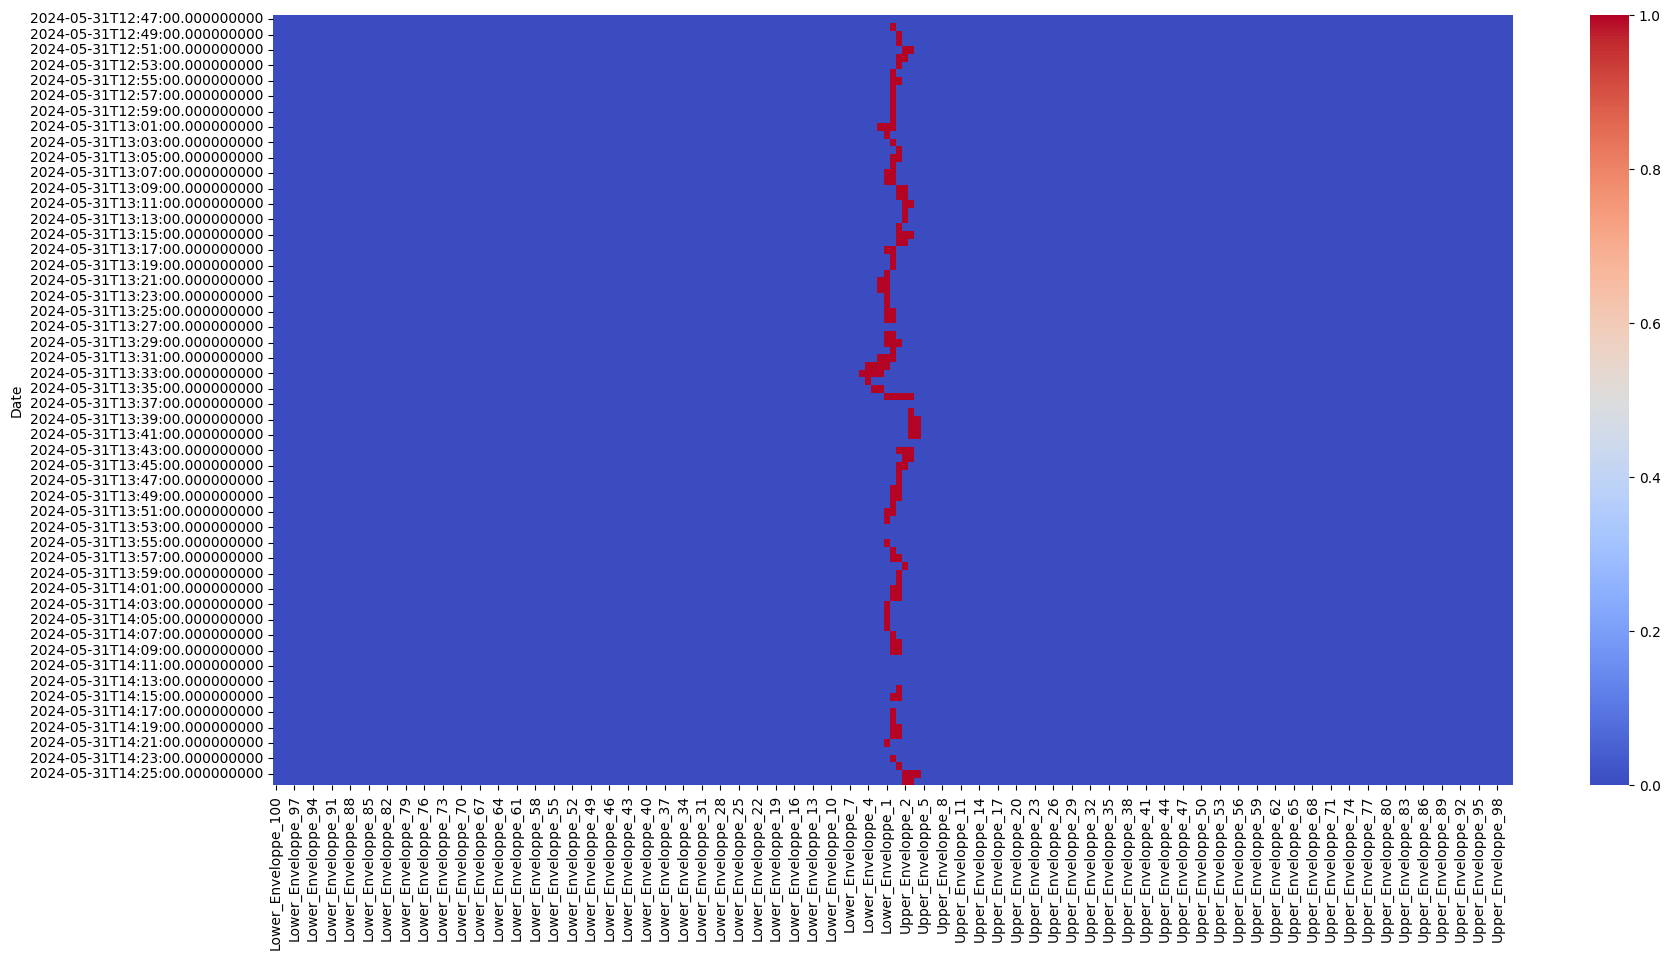

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

inrange = (indicators < price['High'].values.reshape(-1, 1)) & (indicators > price['Low'].values.reshape(-1, 1))

print((inrange.sum(axis=1).mean()))

plt.figure(figsize=(20, 10))
sns.heatmap(inrange[-100:], cmap='coolwarm')

,Lower_Enveloppe_100,Lower_Enveloppe_99,Lower_Enveloppe_98,Lower_Enveloppe_97,Lower_Enveloppe_96,Lower_Enveloppe_95,Lower_Enveloppe_94,Lower_Enveloppe_93,Lower_Enveloppe_92,Lower_Enveloppe_91,...,Upper_Enveloppe_91,Upper_Enveloppe_92,Upper_Enveloppe_93,Upper_Enveloppe_94,Upper_Enveloppe_95,Upper_Enveloppe_96,Upper_Enveloppe_97,Upper_Enveloppe_98,Upper_Enveloppe_99,Upper_Enveloppe_100
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-23 03:56:00,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,...,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975
2024-03-23 03:57:00,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,...,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975
2024-03-23 03:58:00,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,...,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975
2024-03-23 03:59:00,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,...,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975
2024-03-23 04:00:00,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,...,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 14:22:00,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,...,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975
2024-05-31 14:23:00,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,...,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975
2024-05-31 14:24:00,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,0.004975,...,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975,-0.004975


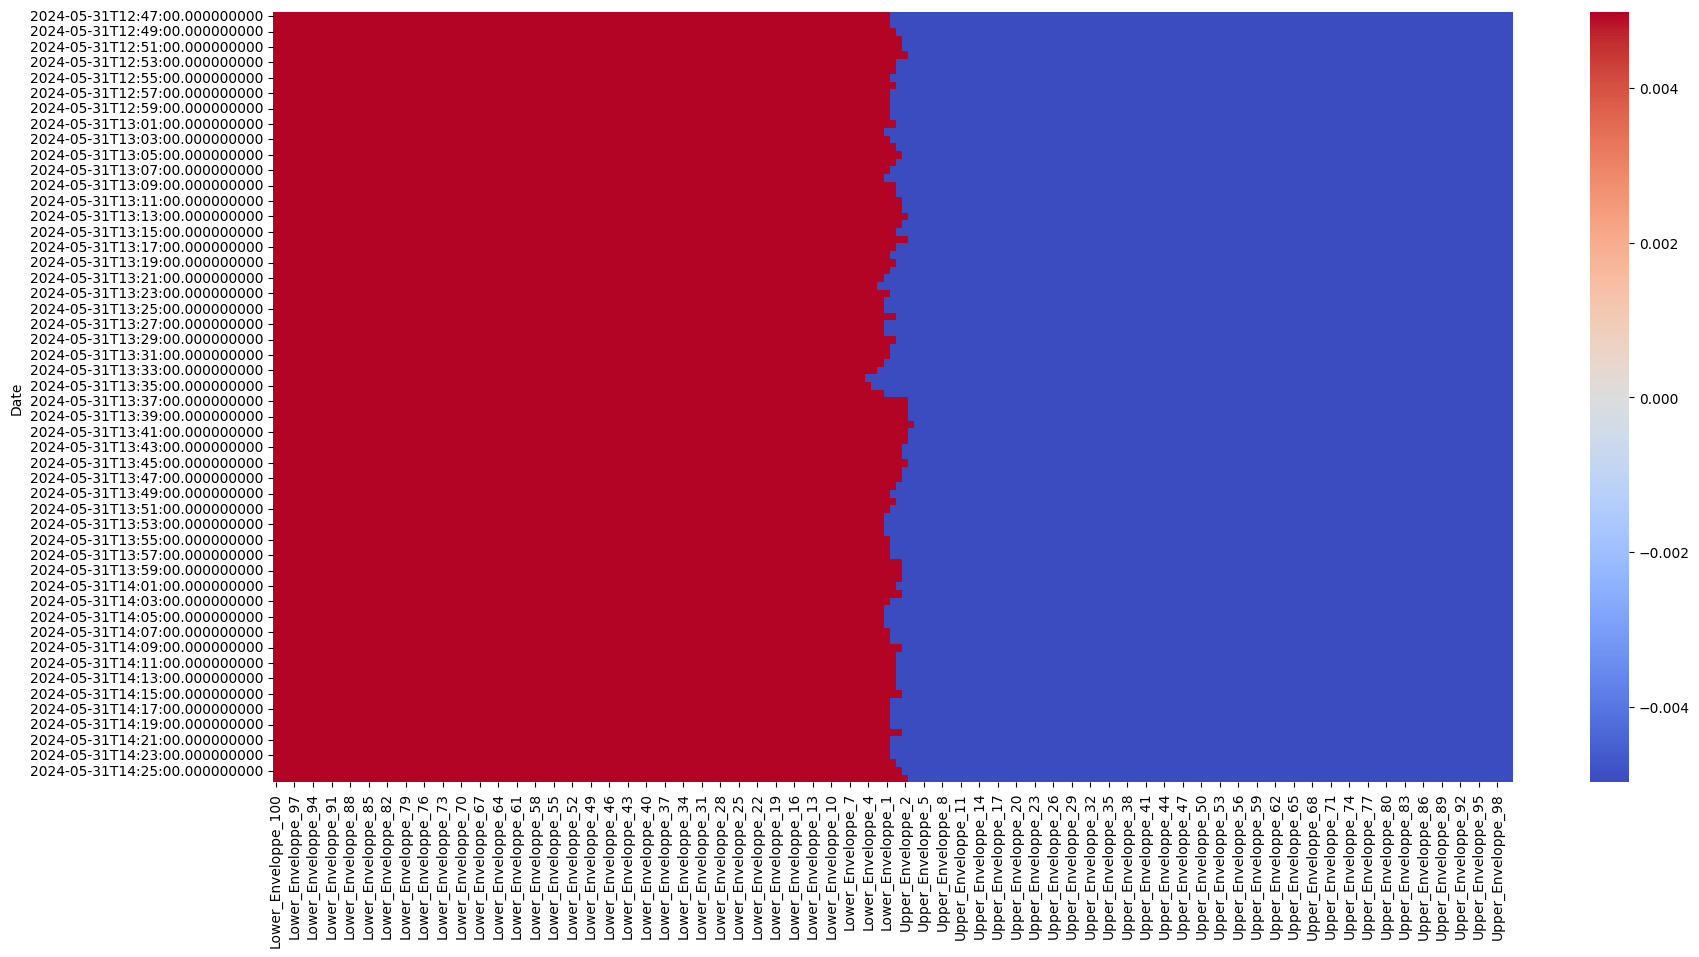

In [42]:
# order_type = (indicators < price['Open'].values.reshape(-1, 1))
order_type = pd.DataFrame(np.where(indicators < price['Open'].values.reshape(-1, 1), 1, -1), index=indicators.index, columns=indicators.columns)/len(indicators.columns)


plt.figure(figsize=(20, 10))
sns.heatmap(order_type[-100:], cmap='coolwarm')

order_type

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Date
2024-03-23 03:56:00   -0.009950
2024-03-23 03:57:00    0.000000
2024-03-23 03:58:00   -0.014925
2024-03-23 03:59:00   -0.029851
2024-03-23 04:00:00   -0.044776
                         ...   
2024-05-31 14:22:00    2.706468
2024-05-31 14:23:00    2.701493
2024-05-31 14:24:00    2.696517
2024-05-31 14:25:00    2.681592
2024-05-31 14:26:00    2.681592
Length: 99991, dtype: float64


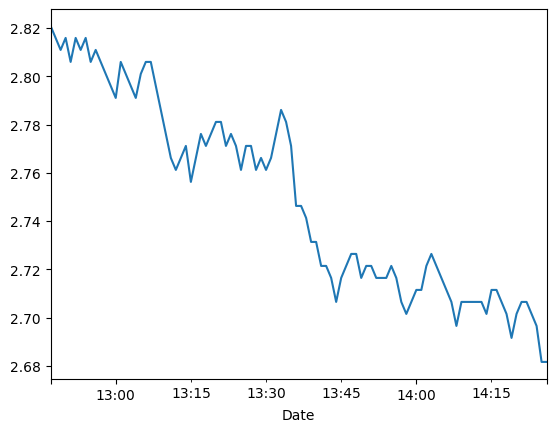

<Axes: xlabel='Date'>

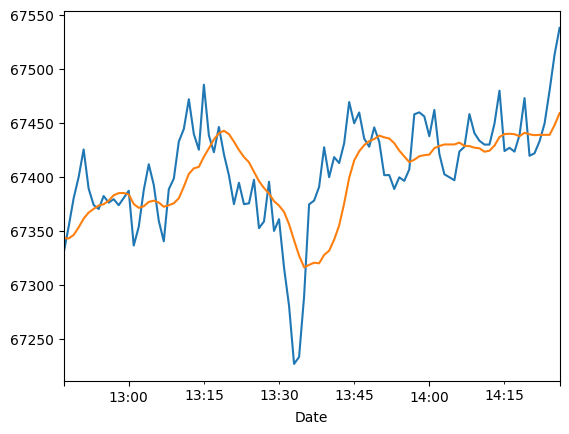

In [71]:
first_ind = indicators.iloc[0]
first_price = price.iloc[0]

higher = max(first_price['Open'], first_ind['SMA'])
lower = min(first_price['Open'], first_ind['SMA'])

first_order = np.where((first_ind > lower) & (first_ind < higher), 1, 0)

print(first_order)

btc_balance = ((order_type*inrange).sum(axis=1)).cumsum()
print(btc_balance)
btc_balance[-100:].plot()
plt.show()

price['Close'][-100:].plot()
indicators['SMA'][-100:].plot()

# plt.plot(price.index, price['Close'])
# plt.plot(indicators.index, indicators['SMA'])


In [13]:
from numba import jit

@jit(nopython=True)
def backtest(data, indicators):
    data = data.copy()
    indicators = indicators.copy()
    
    for i, row in enumerate(data.values):
        

    
    indicators[inrange]

In [14]:
import numpy as np

class Backtest:
    def __init__(self, data, indicators):
        self.data = data
        self.indicators = indicators
        self.open_position = {'id': np.array([]), 'size': np.array([]), 'price': np.array([]), 'time': np.array([])}
        self.position = {'id': np.array([]), 'size': np.array([]), 'price': np.array([]), 'time': np.array([]), 'side': np.array([])}
        self.pnl = 0
        self.trades = 0
        self.fees = 0.00075
        
    def orders(self):
        for i in range(1, len(self.indicators)):
            if self.indicators['Close'][i] > self.indicators['Upper_Enveloppe_10'][i]:
                self.open_position['id'] = np.append(self.open_position['id'], self.trades)
                self.open_position['size'] = np.append(self.open_position['size'], 1)
                self.open_position['price'] = np.append(self.open_position['price'], self.data['Close'][i])
                self.open_position['time'] = np.append(self.open_position['time'], self.data.index[i])
                self.open_position['side'] = np.append(self.open_position['side'], 'buy')
                self.trades += 1
            if self.indicators['Close'][i] < self.indicators['Lower_Enveloppe_10'][i]:
                self.open_position['id'] = np.append(self.open_position['id'], self.trades)
                self.open_position['size'] = np.append(self.open_position['size'], 1)
                self.open_position['price'] = np.append(self.open_position['price'], self.data['Close'][i])
                self.open_position['time'] = np.append(self.open_position['time'], self.data.index[i])
                self.open_position['side'] = np.append(self.open_position['side'], 'sell')
                self.trades += 1    

In [15]:
from backtesting import Backtest, Strategy

class Enveloppe(Strategy):
    def init(self):
        self.data = self.data
        self.indicators = self.indicators
        self.open_position = {'id': np.array([]), 'size': np.array([]), 'price': np.array([]), 'time': np.array([])}
        self.position = {'id': np.array([]), 'size': np.array([]), 'price': np.array([]), 'time': np.array([]), 'side': np.array([])}
        self.pnl = 0
        self.trades = 0
        self.fees = 0.00075
        
    def next(self):
        if self.indicators['Close'] > self.indicators['Upper_Enveloppe_10']:
            self.open_position['id'] = np.append(self.open_position['id'], self.trades)
            self.open_position['size'] = np.append(self.open_position['size'], 1)
            self.open_position['price'] = np.append(self.open_position['price'], self.data['Close'])
            self.open_position['time'] = np.append(self.open_position['time'], self.data.index)
            self.open_position['side'] = np.append(self.open_position['side'], 'buy')
            self.trades += 1
        if self.indicators['Close'] < self.indicators['Lower_Enveloppe_10']:
            self.open_position['id'] = np.append(self.open_position['id'], self.trades)
            self.open_position['size'] = np.append(self.open_position['size'], 1)
            self.open_position['price'] = np.append(self.open_position['price'], self.data['Close'])
            self.open_position['time'] = np.append(self.open_position['time'], self.data.index)
            self.open_position['side'] = np.append(self.open_position['side'], 'sell')
            self.trades += 1

ModuleNotFoundError: No module named 'backtesting'